In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
import matplotlib.offsetbox as offsetbox
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib as mpl

# Set a higher limit for the animation size
mpl.rcParams['animation.embed_limit'] = 50 


In [6]:
nvda_stock=pd.read_csv('NVDA.csv')

In [8]:
nvda_stock.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [10]:
nvda_stock['Date'] = pd.to_datetime(nvda_stock['Date'])

In [12]:
arm_stock=pd.read_csv('ARM.csv')

In [14]:
arm_stock.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [16]:
arm_stock['Date'] = pd.to_datetime(arm_stock['Date'])

In [18]:
mu_stock=pd.read_csv('MU.csv')


In [20]:
mu_stock['Date'] = pd.to_datetime(mu_stock['Date'])

In [22]:
smci_stock=pd.read_csv('SMCI.csv')

In [24]:
smci_stock['Date'] = pd.to_datetime(smci_stock['Date'])

In [26]:
tsm_stock=pd.read_csv('TSM.csv')

In [28]:
tsm_stock['Date'] = pd.to_datetime(tsm_stock['Date'])

In [30]:
tsm_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-27,41.549999,41.680000,41.270000,41.349998,37.265190,4192800
1,2019-08-28,41.320000,41.770000,41.049999,41.650002,37.535549,3586000
2,2019-08-29,42.340000,42.570000,42.230000,42.279999,38.103313,5171600
3,2019-08-30,42.709999,42.889999,42.360001,42.630001,38.418743,5382200
4,2019-09-03,42.150002,42.160000,41.580002,41.720001,37.598637,4748000
...,...,...,...,...,...,...,...
1253,2024-08-20,175.399994,175.399994,169.850006,172.039993,172.039993,13555500
1254,2024-08-21,170.360001,173.080002,169.910004,171.440002,171.440002,9434800
1255,2024-08-22,172.000000,173.279999,166.059998,166.440002,166.440002,13546100
1256,2024-08-23,169.000000,173.289993,167.919998,171.279999,171.279999,12189100


In [32]:
nvda_earnings_dates=pd.read_excel('Book1.xlsx')

In [34]:
nvda_earnings_dates.dtypes

nvdia_earnings_call    object
dtype: object

In [36]:
nvda_earnings_dates

,nvdia_earnings_call
0,"Aug 28, 2024"
1,"May 22, 2024"
2,"Feb 21, 2024"
3,"Nov 21, 2023"
4,"Aug 23, 2023"
5,"May 24, 2023"
6,"Feb 22, 2023"
7,"Nov 16, 2022"
8,"Aug 24, 2022"
9,"May 25, 2022"


In [38]:
print(nvda_earnings_dates.columns)


Index(['nvdia_earnings_call'], dtype='object')


In [40]:
# Convert the 'Date' column to datetime format
mu_stock['Date'] = pd.to_datetime(mu_stock['Date'])
smci_stock['Date'] = pd.to_datetime(smci_stock['Date'])
arm_stock['Date'] = pd.to_datetime(arm_stock['Date'])
nvda_stock['Date'] = pd.to_datetime(nvda_stock['Date'])
nvda_earnings_dates['nvdia_earnings_call'] = pd.to_datetime(nvda_earnings_dates['nvdia_earnings_call'])


In [44]:
images = {
    'NVDIA': Image.open('nvidia_logo_small.jpeg'),
    'ARM': Image.open('arm logo.png'),
    'Micron': Image.open('Logo-Micron.jpg'),
    'SMCI': Image.open('smci_logo.png'),
    
}

(-5.9695, 201.050003)

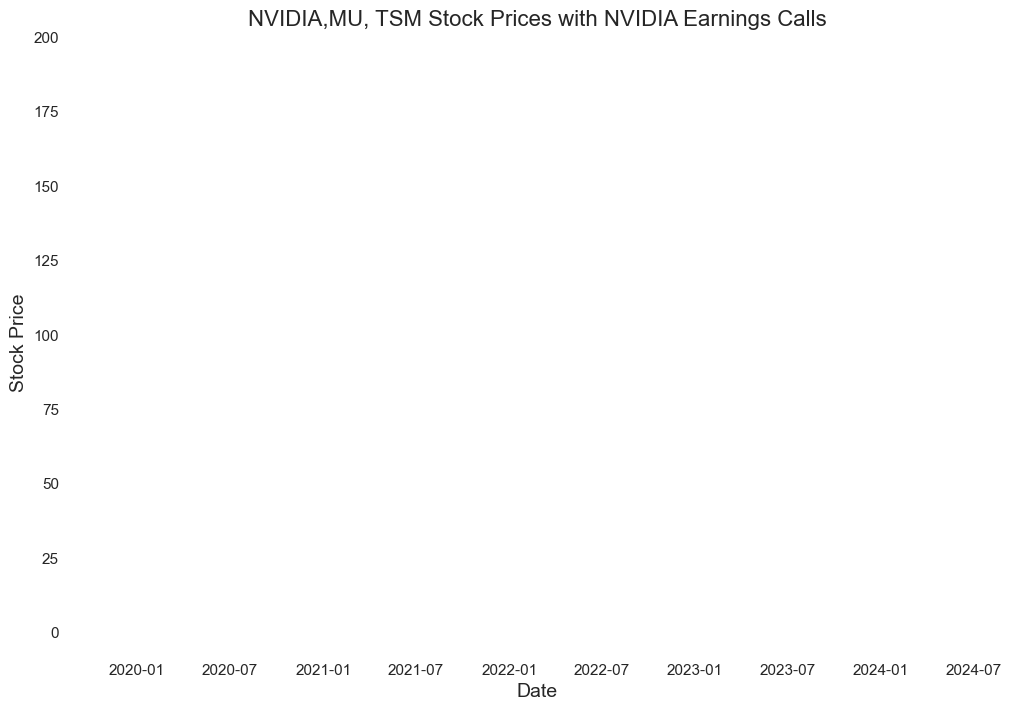

In [50]:
# Set Up the Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Remove grid lines and set background to white
ax.set_facecolor('white')
ax.grid(False)

# Setting labels and title with Seaborn style
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Stock Price', fontsize=14)
ax.set_title('NVIDIA,MU, TSM Stock Prices with NVIDIA Earnings Calls', fontsize=16)

# Set plot limits based on your data
ax.set_xlim(nvda_stock['Date'].min(), nvda_stock['Date'].max())
ax.set_ylim(min(tsm_stock['Close'].min(), nvda_stock['Close'].min()) - 10,
            max(tsm_stock['Close'].max(), nvda_stock['Close'].max()) + 10)


In [51]:
# Add Data to the Plot
# Initialize lines for each company
line_mu, = ax.plot([], [], lw=2, label='Micron Technology (MU)', color='gray', alpha=0.3)
line_tsm, = ax.plot([], [], lw=2, label='TSM', color='black', alpha=0.6)
line_nvda, = ax.plot([], [], lw=2, label='NVIDIA (NVDA)', color='green')

# Add vertical lines for NVIDIA earnings calls
legend_added = False
for date in nvda_earnings_dates['nvdia_earnings_call']:
    if not legend_added:
        ax.axvline(x=date, color='orange', linestyle='-', label='NVIDIA Earnings Call')
        legend_added = True
    else:
        ax.axvline(x=date, color='orange', linestyle='-')

# Add the legend
ax.legend(loc='upper left', fontsize=12)


In [54]:
# Add Markers to the Plot
# Load and adjust images for each company
images = {
    'NVDA': Image.open('nvdia_logo.jpg').resize((30, 30)),
    'Micron': Image.open('Logo-Micron.jpg').resize((30, 30)),
    'TSM': Image.open('tsm-lg.png').resize((30, 30)),
}

# Creating OffsetImages for the markers
markers = {
    'Micron': offsetbox.AnnotationBbox(offsetbox.OffsetImage(images['Micron'], zoom=0.8), 
                                       (mu_stock['Date'].iloc[0].to_pydatetime(), mu_stock['Close'].iloc[0]), 
                                       frameon=False),
    'NVDA': offsetbox.AnnotationBbox(offsetbox.OffsetImage(images['NVDA'], zoom=0.8), 
                                     (nvda_stock['Date'].iloc[0].to_pydatetime(), nvda_stock['Close'].iloc[0]), 
                                     frameon=False),
    'TSM': offsetbox.AnnotationBbox(offsetbox.OffsetImage(images['TSM'], zoom=0.8), 
                                     (tsm_stock['Date'].iloc[0].to_pydatetime(), tsm_stock['Close'].iloc[0]), 
                                     frameon=False)
}

# Adding markers to the plot
for marker in markers.values():
    ax.add_artist(marker)


In [56]:
# Define Initialization Function
def init():
    # Initialize empty data for lines
    line_mu.set_data([], [])
    line_nvda.set_data([], [])
    line_tsm.set_data([], [])
    # Set initial positions for markers
    markers['Micron'].xybox = (mu_stock['Date'].iloc[0].to_pydatetime(), mu_stock['Close'].iloc[0])
    markers['NVDA'].xybox = (nvda_stock['Date'].iloc[0].to_pydatetime(), nvda_stock['Close'].iloc[0])
    markers['TSM'].xybox = (tsm_stock['Date'].iloc[0].to_pydatetime(), tsm_stock['Close'].iloc[0])
    return line_mu, line_nvda,line_tsm, markers['Micron'], markers['NVDA'],markers['TSM']

# Define Animation Function
def animate(i):
    # Update line data up to the ith frame
    line_mu.set_data(mu_stock['Date'][:i], mu_stock['Close'][:i])
    line_nvda.set_data(nvda_stock['Date'][:i], nvda_stock['Close'][:i])
    line_tsm.set_data(tsm_stock['Date'][:i], tsm_stock['Close'][:i])
    # Update marker positions to the ith data point
    markers['Micron'].xybox = (mu_stock['Date'].iloc[i].to_pydatetime(), mu_stock['Close'].iloc[i])
    markers['NVDA'].xybox = (nvda_stock['Date'].iloc[i].to_pydatetime(), nvda_stock['Close'].iloc[i])
    markers['TSM'].xybox = (tsm_stock['Date'].iloc[i].to_pydatetime(), tsm_stock['Close'].iloc[i])
    return line_mu, line_nvda,line_tsm, markers['Micron'], markers['NVDA'],markers['TSM']


In [58]:
# Optimize the number of frames by skipping some
skip_frames = 5
min_length = min(len(mu_stock), len(nvda_stock)) // skip_frames

# Create the animation object with a faster frame rate
ani = animation.FuncAnimation(fig, animate, frames=range(0, min_length*skip_frames, skip_frames), init_func=init,
                              interval=50, blit=True)


In [60]:
# Save the animation as a video 
ani.save('nvidia_micron_animation_no_grid.mp4', writer='ffmpeg', fps=10)

In [61]:
# Display the Animation 
from IPython.display import Video
Video('nvidia_micron_animation_no_grid.mp4', embed=True)
